In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import cv2

In [10]:
# Open the camera
cap = cv2.VideoCapture(1)

# Single frame capture
ret, frame = cap.read()
# Close the camera
cap.release()

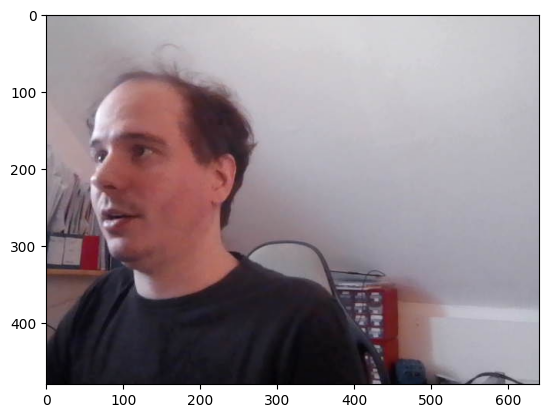

In [12]:
# Convert to GB
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [13]:
frame

array([[[167, 166, 172],
        [166, 165, 171],
        [166, 165, 171],
        ...,
        [195, 194, 200],
        [195, 194, 200],
        [195, 194, 200]],

       [[166, 165, 171],
        [166, 165, 171],
        [166, 165, 171],
        ...,
        [195, 194, 200],
        [195, 194, 200],
        [195, 194, 200]],

       [[165, 164, 170],
        [165, 164, 170],
        [165, 164, 170],
        ...,
        [195, 194, 200],
        [195, 194, 200],
        [195, 194, 200]],

       ...,

       [[ 13,  12,  18],
        [ 12,  11,  17],
        [ 11,  10,  16],
        ...,
        [161, 163, 170],
        [161, 163, 170],
        [161, 163, 170]],

       [[ 12,  11,  17],
        [ 12,  11,  17],
        [ 10,   9,  15],
        ...,
        [166, 168, 175],
        [166, 168, 175],
        [166, 168, 175]],

       [[ 12,  11,  17],
        [ 11,  10,  16],
        [ 10,   9,  15],
        ...,
        [164, 166, 173],
        [164, 166, 173],
        [164, 166, 173]]

In [19]:
frame[:,:, 0]

array([[167, 166, 166, ..., 195, 195, 195],
       [166, 166, 166, ..., 195, 195, 195],
       [165, 165, 165, ..., 195, 195, 195],
       ...,
       [ 13,  12,  11, ..., 161, 161, 161],
       [ 12,  12,  10, ..., 166, 166, 166],
       [ 12,  11,  10, ..., 164, 164, 164]], shape=(480, 640), dtype=uint8)

In [20]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(frame[:,:, 0] @ frame[:,:, 0].T)

In [21]:
eigenvalues

array([ 6.13720299e+04, -3.20253561e+03, -3.14810223e+03, -3.11893843e+03,
       -3.08470552e+03, -3.04787527e+03, -3.02818228e+03, -2.98152951e+03,
       -2.94451988e+03, -2.93975011e+03, -2.90700153e+03, -2.89974658e+03,
       -2.89700114e+03, -2.85121328e+03, -2.83016932e+03, -2.80499459e+03,
       -2.78744937e+03, -2.77468100e+03, -2.73177833e+03, -2.70862848e+03,
       -2.69975335e+03, -2.66565796e+03, -2.59996287e+03, -2.64239318e+03,
       -2.62035929e+03, -2.62984303e+03,  3.14500462e+03,  3.09449996e+03,
        3.05023821e+03,  3.02183134e+03,  3.00163994e+03,  2.98556833e+03,
        2.96486952e+03,  2.94137063e+03,  2.91612864e+03,  2.90129750e+03,
        2.87727061e+03,  2.86773862e+03,  2.80531139e+03,  2.78558480e+03,
        2.74932667e+03,  2.73735605e+03,  2.72678593e+03,  2.72420682e+03,
        2.69547464e+03,  2.67600206e+03,  2.66613748e+03,  2.63776704e+03,
        2.57860403e+03,  2.58833681e+03,  2.62316378e+03,  2.61893401e+03,
        2.55764495e+03,  

## Extra: basic matrix operations with image

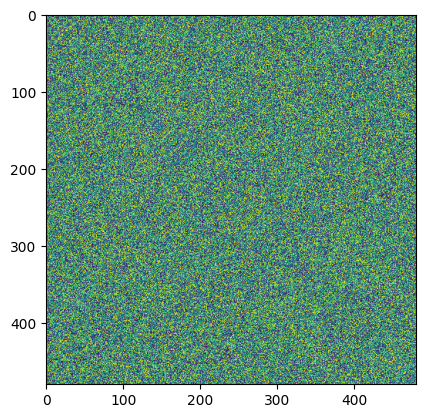

In [22]:
plt.imshow(frame[:,:, 0] @ frame[:,:, 0].T)

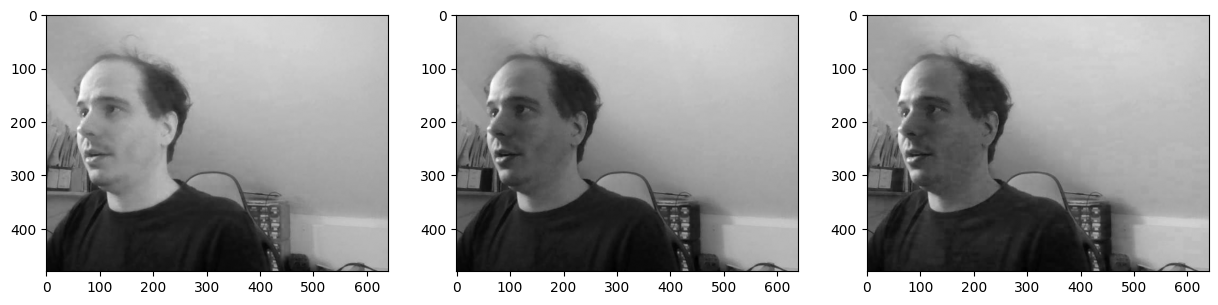

In [23]:
# Show each channel
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(frame[:,:, 0], cmap='gray')
plt.subplot(132)
plt.imshow(frame[:,:, 1], cmap='gray')
plt.subplot(133)
plt.imshow(frame[:,:, 2], cmap='gray')

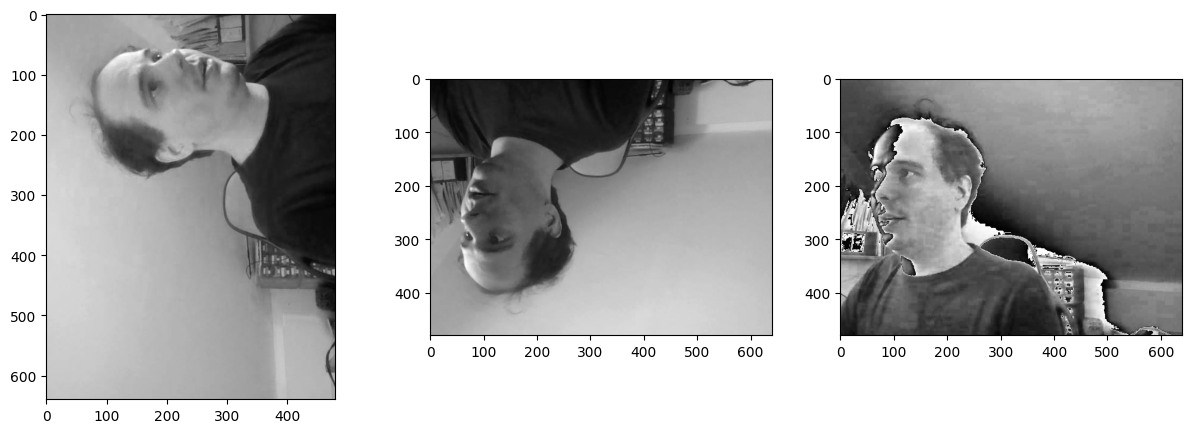

In [24]:
# Transpose
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(frame[:,:, 0].T, cmap='gray')
# Flip the image
plt.subplot(132)
plt.imshow(np.flip(frame[:,:, 1], axis=0), cmap='gray')
# Multiply by a scalar
plt.subplot(133)
plt.imshow(frame[:,:, 2] * 2, cmap='gray')

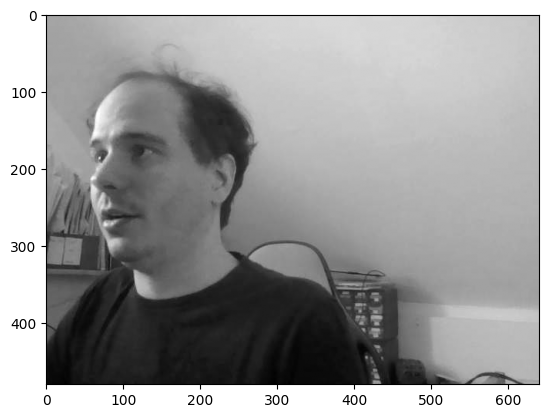

In [25]:
# Sum of all channels
plt.imshow(frame.sum(axis=2), cmap='gray')

In [27]:
# Calculate Sobel operator
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [28]:
# Apply Sobel operator
sobel_x_img = cv2.filter2D(frame[:,:, 0], -1, sobel_x)
sobel_y_img = cv2.filter2D(frame[:,:, 0], -1, sobel_y)

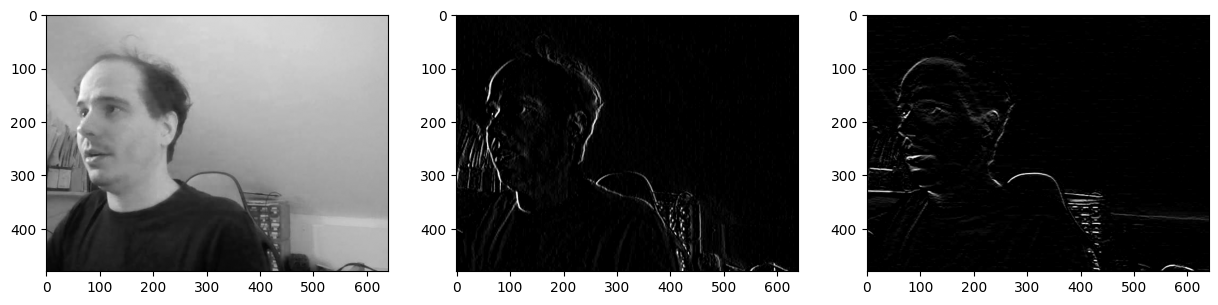

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(frame[:,:, 0], cmap='gray')
plt.subplot(132)
plt.imshow(sobel_x_img, cmap='gray')
plt.subplot(133)
plt.imshow(sobel_y_img, cmap='gray')
